In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [2]:
import malaya

model = malaya.dependency.transformer(model = 'xlnet', quantized = True)
pos = malaya.pos.transformer(model = 'xlnet', quantized = True)

In [14]:
t = 'Dirk Jan Klaas Huntelaar merupakan pemain bola sepak Belanda yang bermain di posisi penyerang'

In [4]:
tokenizer = malaya.preprocessing.TOKENIZER().tokenize

In [15]:
tokens = tokenizer(t)

In [16]:
graph, tagging, indexing = model.predict(' '.join(tokens))

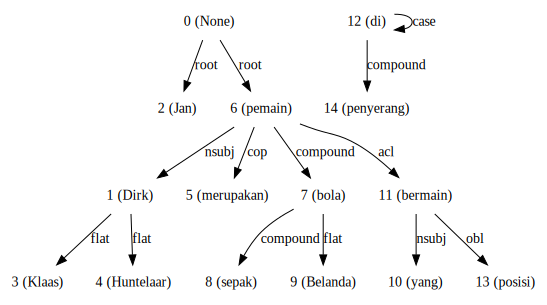

In [17]:
graph.to_graphvis()

In [24]:
import copy
import re

def reset_t(tokens):
    t = []
    for i in range(len(tokens)):
        t.append([tokens[i], 2])
    return t

def augment_3_0(t, row, selected = ['compound', 'flat']):
    text, tokens, tokens_lower, graph = row
    l = list(graph.nodes.items())
    for no, n in enumerate(l[1:]):
        n = n[1]
        if n['rel'] in selected and n['address'] - 1 == n['head']:
            if n['word'] == t[n['head'] - 1][0]:
                print('repeated word, continue')
                continue
            c = t[n['head'] - 1].copy()
            c[1] = 3
            t[n['head'] - 1] = [t[n['address'] - 1][0], 3]
            t[n['address'] - 1] = c

In [29]:
text = 'Dirk Jan Klaas Huntelaar merupakan pemain bola sepak Belanda yang bermain di posisi penyerang'
tokens = tokenizer(text)
graph, tagging, indexing = model.predict(' '.join(tokens))
t = reset_t(tokens)
t_ = copy.deepcopy(t)
tokens_lower = tokenizer(text.lower())
r = (t, tokens, tokens_lower, graph)
augment_3_0(t_, r)

In [30]:
t_

[['Dirk', 2],
 ['Jan', 2],
 ['Huntelaar', 3],
 ['Klaas', 3],
 ['merupakan', 2],
 ['bola', 3],
 ['sepak', 3],
 ['pemain', 3],
 ['Belanda', 2],
 ['yang', 2],
 ['bermain', 2],
 ['di', 2],
 ['posisi', 2],
 ['penyerang', 2]]